## Classification Recap Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Titanic_Dataset=pd.read_csv('Titanic-Dataset.csv')
Titanic_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

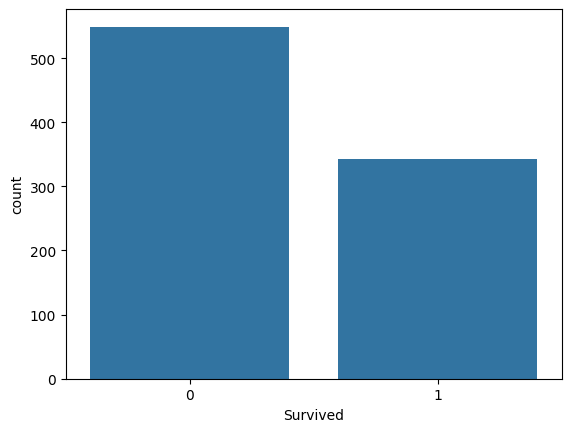

In [3]:
sns.countplot(x='Survived',data=Titanic_Dataset)



<Axes: xlabel='Pclass', ylabel='count'>

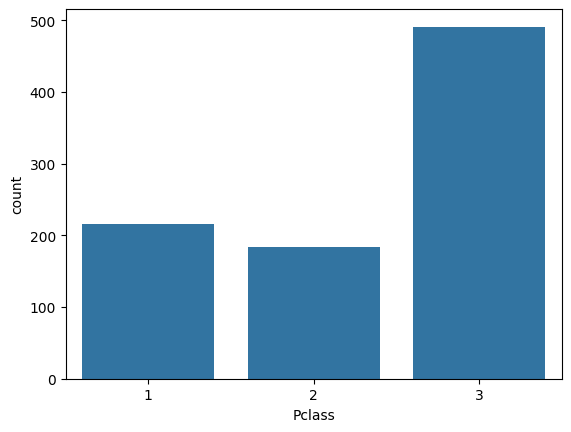

In [4]:
sns.countplot(x='Pclass',data=Titanic_Dataset)


<Axes: xlabel='Sex', ylabel='count'>

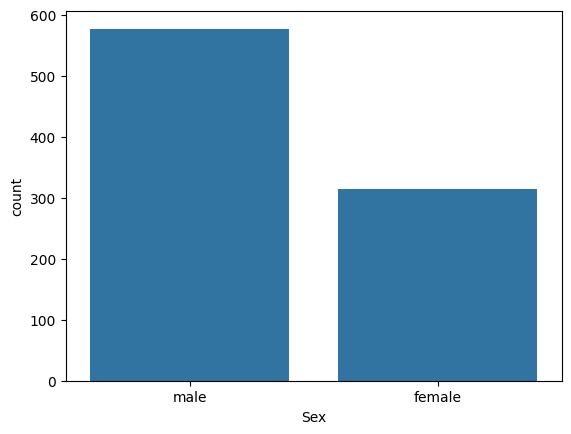

In [5]:
sns.countplot(x='Sex',data=Titanic_Dataset)


<Axes: xlabel='Embarked', ylabel='count'>

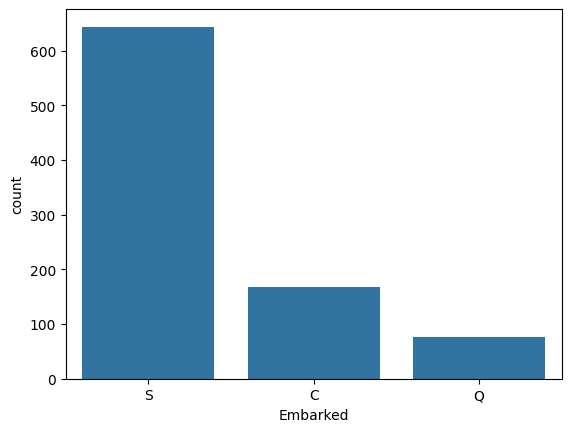

In [6]:
sns.countplot(x='Embarked',data=Titanic_Dataset)


<Axes: xlabel='Age', ylabel='Count'>

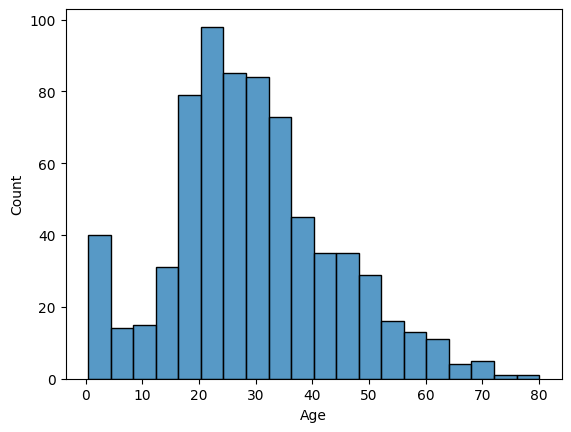

In [7]:
sns.histplot(Titanic_Dataset['Age'])

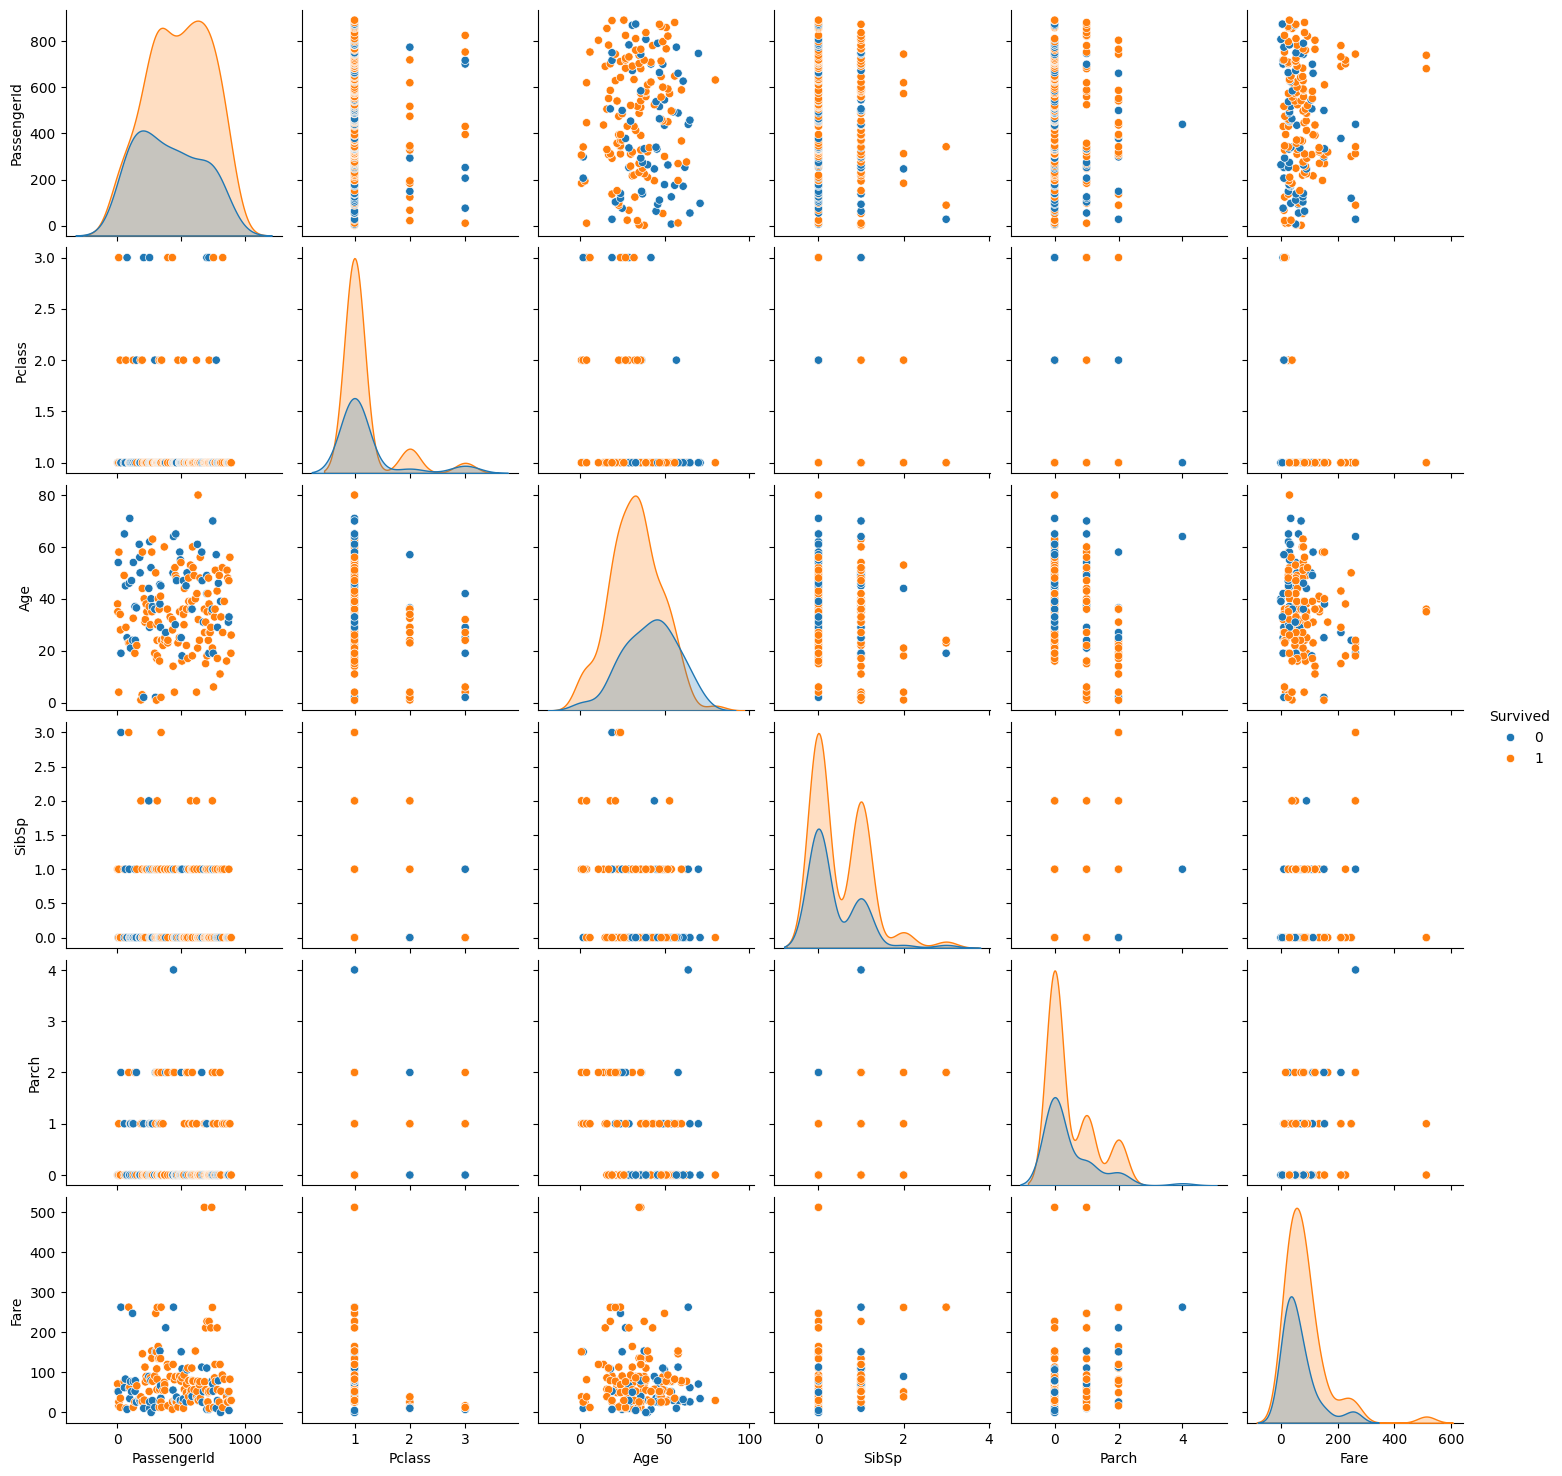

In [8]:
sns.pairplot(Titanic_Dataset.dropna(), hue='Survived')


<Axes: >

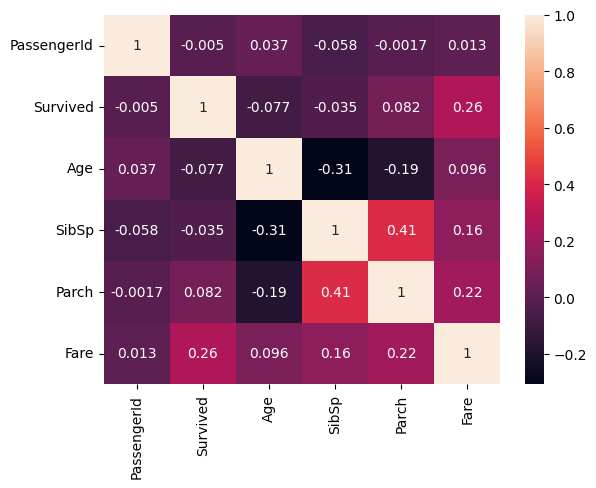

In [9]:
numeric = Titanic_Dataset.iloc[: , [0,1,5,6,7,9]]
cor = numeric.corr()
sns.heatmap(cor,annot=True)

In [10]:
Processed_Titanic_Dataset1=pd.read_csv('preprocessed_titanic_data.csv')
Processed_Titanic_Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Survived                  891 non-null    int64  
 1   SibSp                     891 non-null    int64  
 2   Parch                     891 non-null    int64  
 3   Fare                      891 non-null    float64
 4   Sex_female                891 non-null    int64  
 5   Sex_male                  891 non-null    int64  
 6   Pclass_C                  891 non-null    int64  
 7   Pclass_Q                  891 non-null    int64  
 8   Pclass_S                  891 non-null    int64  
 9   Pclass_U                  891 non-null    int64  
 10  Sex_female.1              891 non-null    int64  
 11  Sex_male.1                891 non-null    int64  
 12  Pclass_C.1                891 non-null    int64  
 13  Pclass_Q.1                891 non-null    int64  
 14  Pclass_S.1

In [11]:
Processed_Titanic_Dataset2=Titanic_Dataset.drop(columns=['Name','PassengerId','Ticket','Cabin'])
Processed_Titanic_Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
# Define the function to categorize based on range
def categorize_value(x):
    if 0 <= x <= 10:
        return 'A'
    elif 11 <= x <= 20:
        return 'B'
    elif 21 <= x <= 35:
        return 'C'
    elif 36 <= x <= 55:
        return 'D'
    elif 56 <= x <= 70:
        return 'E'
    elif 71 <= x <= 100:
        return 'F'
    else:
        return 'Other'

# Apply the function to create a new categorical column
Processed_Titanic_Dataset2['Age'] = Processed_Titanic_Dataset2['Age'].apply(categorize_value)

In [13]:
Processed_Titanic_Dataset2 = pd.get_dummies(Processed_Titanic_Dataset2, columns=['Pclass','Sex','Age','Embarked'])
Processed_Titanic_Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    bool   
 5   Pclass_2    891 non-null    bool   
 6   Pclass_3    891 non-null    bool   
 7   Sex_female  891 non-null    bool   
 8   Sex_male    891 non-null    bool   
 9   Age_A       891 non-null    bool   
 10  Age_B       891 non-null    bool   
 11  Age_C       891 non-null    bool   
 12  Age_D       891 non-null    bool   
 13  Age_E       891 non-null    bool   
 14  Age_F       891 non-null    bool   
 15  Age_Other   891 non-null    bool   
 16  Embarked_C  891 non-null    bool   
 17  Embarked_Q  891 non-null    bool   
 18  Embarked_S  891 non-null    bool   
dtypes: bool(15), float64(1), int6

In [14]:
Processed_Titanic_Dataset2

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_A,Age_B,Age_C,Age_D,Age_E,Age_F,Age_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True
1,1,1,0,71.2833,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,1,0,0,7.9250,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True
3,1,1,0,53.1000,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True
4,0,0,0,8.0500,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True
887,1,0,0,30.0000,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True
888,0,1,2,23.4500,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True
889,1,0,0,30.0000,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False


In [15]:
Processed_Titanic_Dataset2=Processed_Titanic_Dataset2.astype(int)
Processed_Titanic_Dataset2

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_A,Age_B,Age_C,Age_D,Age_E,Age_F,Age_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1,1,1,0,71,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,7,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,53,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,8,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
887,1,0,0,30,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
888,0,1,2,23,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
889,1,0,0,30,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


### Splitting The Dataset (features & lables) and (training & testing)

In [16]:
from sklearn.model_selection import train_test_split

features=Processed_Titanic_Dataset2.drop(['Survived'],axis=1)
labels  = Processed_Titanic_Dataset2['Survived']

features_train , features_validation_test, labels_train, labels_validation_test = train_test_split(features,labels,test_size=0.2,random_state=42)
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test,labels_validation_test, test_size=0.5,random_state=42)

print(features_train.shape)
print(features_test.shape)
print(features_validation.shape)
print(labels_train.shape)
print(labels_test.shape)
print(labels_validation.shape)

(712, 18)
(90, 18)
(89, 18)
(712,)
(90,)
(89,)


### Calling, Fitting, and using a Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(features_train,labels_train)

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
test_pred = lr_model.predict(features_test)
validation_pred = lr_model.predict(features_validation)

### Evaluating the Logistic Regression Model Performance

In [19]:
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score

print('LogisticRegression train score    :', lr_model.score(features_train,labels_train))
print('LogisticRegression test score     :', accuracy_score(labels_test, test_pred))
print('LogisticRegression validation score     :', accuracy_score(labels_validation, validation_pred))
print('LogisticRegression test roc_auc_score  :', roc_auc_score(labels_test, test_pred))
print('LogisticRegression validation roc_auc_score  :', roc_auc_score(labels_validation, validation_pred))
print('LogisticRegression test f1_score       :', f1_score(labels_test, test_pred))
print('LogisticRegression validation f1_score       :', f1_score(labels_validation, validation_pred))

LogisticRegression train score    : 0.8174157303370787
LogisticRegression test score     : 0.7444444444444445
LogisticRegression validation score     : 0.8539325842696629
LogisticRegression test roc_auc_score  : 0.7310924369747899
LogisticRegression validation roc_auc_score  : 0.8489795918367348
LogisticRegression test f1_score       : 0.6666666666666666
LogisticRegression validation f1_score       : 0.8311688311688312


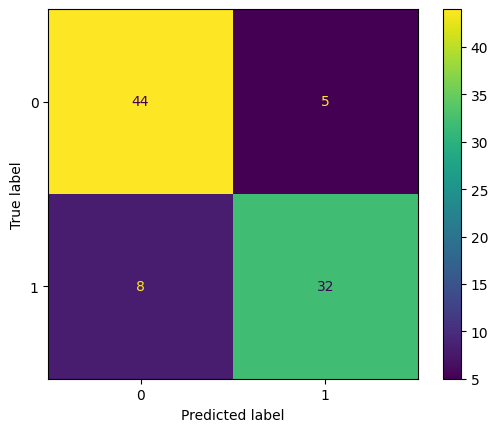

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use sklearn confusion_matrix, ConfusionMatrixDisplay to plot the confusion matrix

cm = confusion_matrix(labels_validation, validation_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

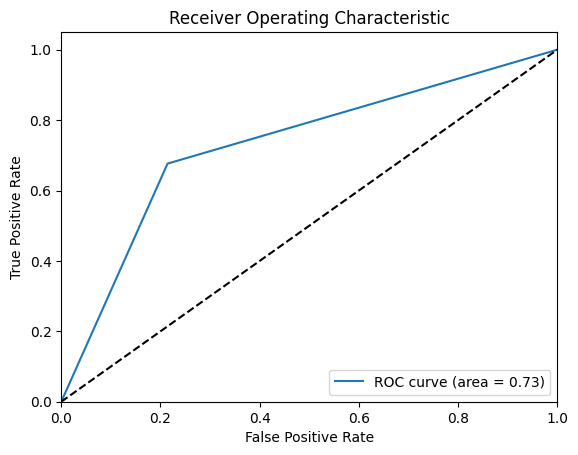

In [21]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, threshold = roc_curve(labels_test, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Calling, Fitting, and using a Linear SVM Logistic Regression Model

In [22]:
from sklearn.svm import SVC

svm_model = SVC().fit(features_train,labels_train)

In [23]:
pred_test_svm = svm_model.predict(features_test)
pred_validation_svm = svm_model.predict(features_validation)

### Evaluating the SVM Logistic Regression Model Performance

In [24]:
print('SVM train score    :', svm_model.score(features_train,labels_train))
print('SVM test score     :', accuracy_score(labels_test, pred_test_svm))
print('SVM validation score     :', accuracy_score(labels_validation, pred_validation_svm))
print('SVM test roc_auc_score  :', roc_auc_score(labels_test, pred_test_svm))
print('SVM validation roc_auc_score  :', roc_auc_score(labels_validation, pred_validation_svm))
print('SVM test f1_score       :', f1_score(labels_test, pred_test_svm))
print('SVM validation f1_score       :', f1_score(labels_validation, pred_validation_svm))

SVM train score    : 0.6699438202247191
SVM test score     : 0.6555555555555556
SVM validation score     : 0.651685393258427
SVM test roc_auc_score  : 0.5730042016806722
SVM validation roc_auc_score  : 0.6147959183673469
SVM test f1_score       : 0.3404255319148936
SVM validation f1_score       : 0.39215686274509803


### Calling, Fitting, and using a Polynomyal SVM Logistic Regression Model

In [25]:
# use poly SVM with Degree = 2
svm_degree_2 =SVC(kernel='poly', degree=2)
svm_degree_2.fit(features_train, labels_train)

print("Polynomial kernel of degree = 2")
print("test Accuracy:", svm_degree_2.score(features_test, labels_test))
print("validation Accuracy:", svm_degree_2.score(features_validation, labels_validation))

# use poly SVM with Degree = 4
svm_degree_4 =SVC(kernel='poly', degree=4)
svm_degree_4.fit(features_train, labels_train)

print("Polynomial kernel of degree = 4")
print("test Accuracy:", svm_degree_4.score(features_test, labels_test))
print("validation Accuracy:", svm_degree_4.score(features_validation, labels_validation))

Polynomial kernel of degree = 2
test Accuracy: 0.6333333333333333
validation Accuracy: 0.5842696629213483
Polynomial kernel of degree = 4
test Accuracy: 0.6444444444444445
validation Accuracy: 0.5842696629213483


# Experimenting with gammas in the rbf kernel

In [26]:
# use SVM rbf with gamma = 0.1
svm_gamma_01 =SVC(kernel='rbf', gamma = 0.1)
svm_gamma_01.fit(features_train, labels_train)
print("Gamma = 0.1")
print("test Accuracy:", svm_gamma_01.score(features_test, labels_test))
print("validation Accuracy:", svm_gamma_01.score(features_validation, labels_validation))


# use SVM rbf with gamma = 1
svm_gamma_1 =SVC(kernel='rbf', gamma = 1)
svm_gamma_1.fit(features_train, labels_train)

print("Gamma = 1")
print("test Accuracy:", svm_gamma_1.score(features_test, labels_test))
print("validation Accuracy:", svm_gamma_1.score(features_validation, labels_validation))

# use SVM rbf with gamma = 10
svm_gamma_10 =SVC(kernel='rbf', gamma = 10)
svm_gamma_10.fit(features_train, labels_train)

print("Gamma = 10")
print("test Accuracy:", svm_gamma_10.score(features_test, labels_test))
print("validation Accuracy:", svm_gamma_10.score(features_validation, labels_validation))

# use SVM rbf with gamma = 100
svm_gamma_100 =SVC(kernel='rbf', gamma = 100)
svm_gamma_100.fit(features_train, labels_train)

print("Gamma = 100")
print("test Accuracy:", svm_gamma_100.score(features_test, labels_test))
print("validation Accuracy:", svm_gamma_100.score(features_validation, labels_validation))


Gamma = 0.1
test Accuracy: 0.7222222222222222
validation Accuracy: 0.8426966292134831
Gamma = 1
test Accuracy: 0.7555555555555555
validation Accuracy: 0.8314606741573034
Gamma = 10
test Accuracy: 0.6666666666666666
validation Accuracy: 0.6853932584269663
Gamma = 100
test Accuracy: 0.6666666666666666
validation Accuracy: 0.6853932584269663


## Decision Tree (using max depth)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
random.seed(0)

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

import utils
dt_classifier = DecisionTreeClassifier(max_depth=7)
dt_classifier.fit(features_train,labels_train)
cls_test_score=dt_classifier.score(features_test,labels_test)
print(cls_test_score)
cls_validation_score=dt_classifier.score(features_validation,labels_validation)
print(cls_validation_score)

0.7666666666666667
0.8539325842696629


## Decision Tree (using Gini index)

In [28]:
dt_classifier2 = DecisionTreeClassifier()
dt_classifier2.fit(features_train, labels_train)
cls_test_score2=dt_classifier2.score(features_test, labels_test)
print(cls_test_score2)
cls_validation_score2=dt_classifier2.score(features_validation,labels_validation)
print(cls_validation_score2)

0.7666666666666667
0.8539325842696629


## Decision Tree (using entropy index)

In [29]:
dt_classifier3 = DecisionTreeClassifier(criterion='entropy')
dt_classifier3.fit(features_train, labels_train)
cls_test_score3=dt_classifier3.score(features_test, labels_test)
print(cls_test_score3)
cls_validation_score3=dt_classifier3.score(features_validation,labels_validation)
print(cls_validation_score3)

0.7666666666666667
0.8539325842696629


# Additional: Using AdaBoost Method

In [30]:
from sklearn.ensemble import AdaBoostClassifier
# Set the random_state so that we always get the same results
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_classifier.fit(features_train, labels_train)
adaboost_test_score=adaboost_classifier.score(features_test, labels_test)
print(adaboost_test_score)
adaboost_validation_score=adaboost_classifier.score(features_validation, labels_validation)
print(adaboost_validation_score)

0.7333333333333333
0.8539325842696629


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
